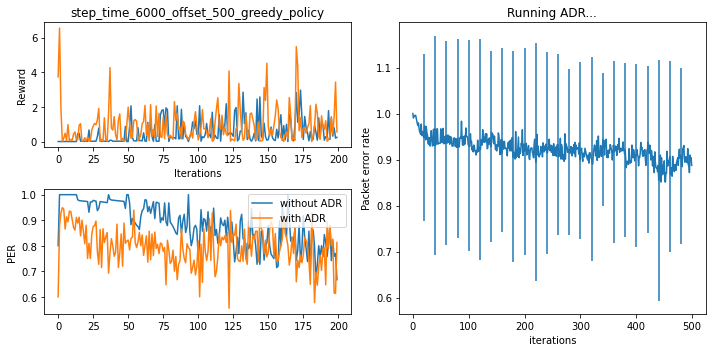

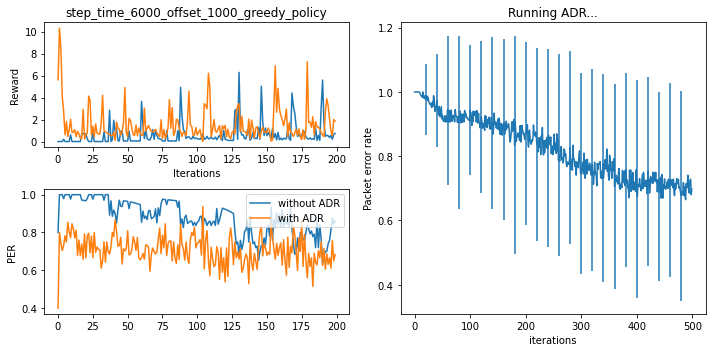

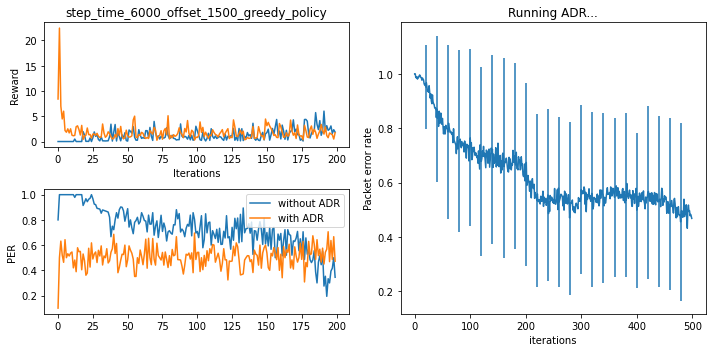

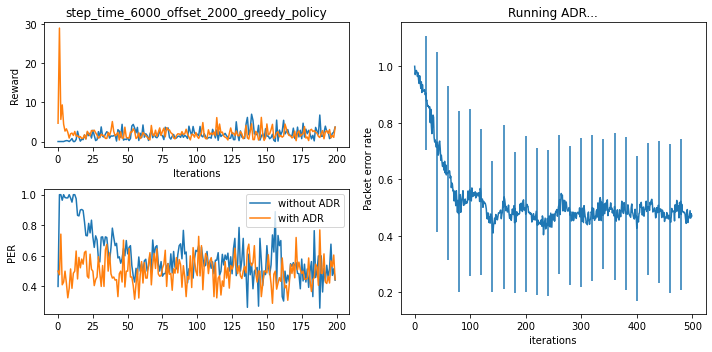

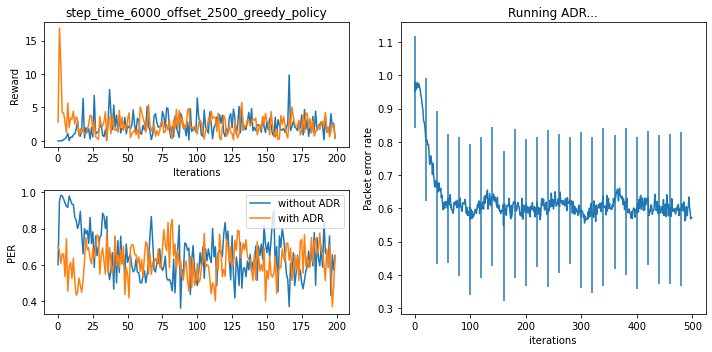

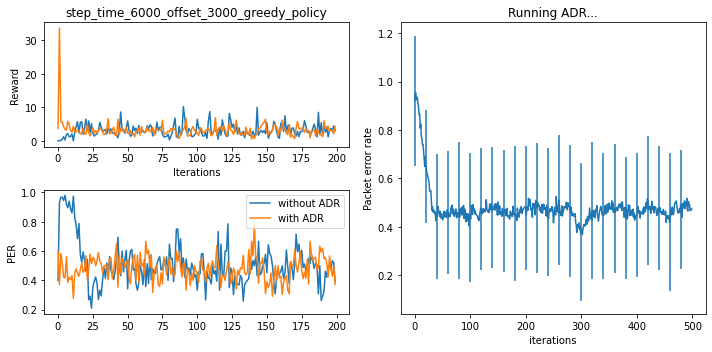

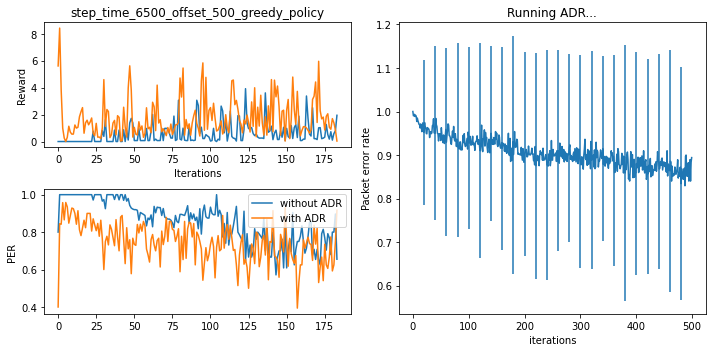

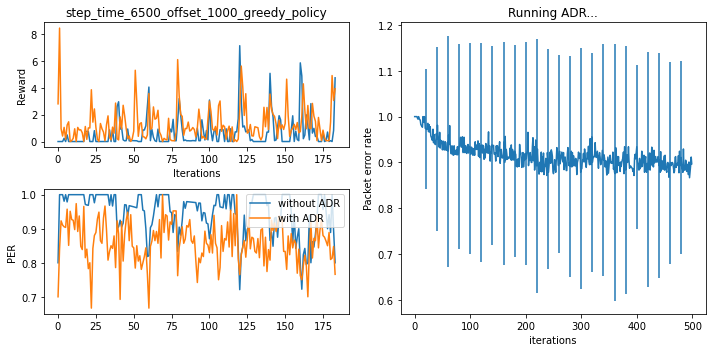

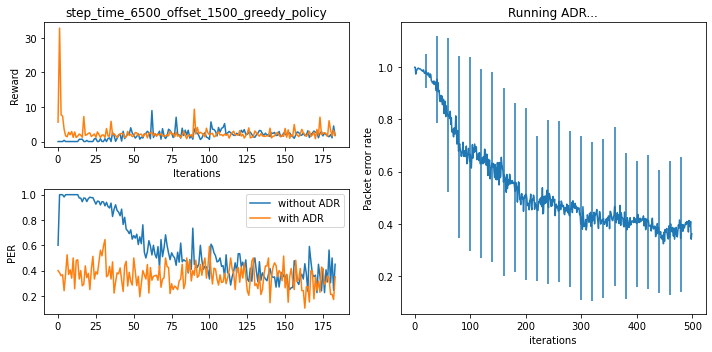

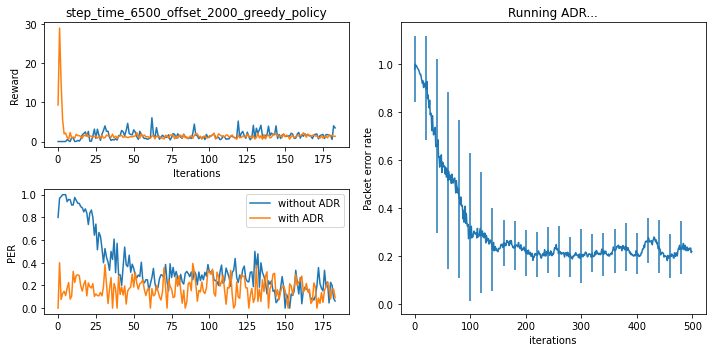

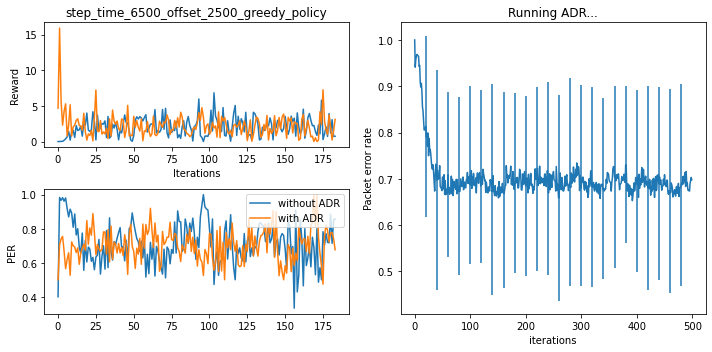

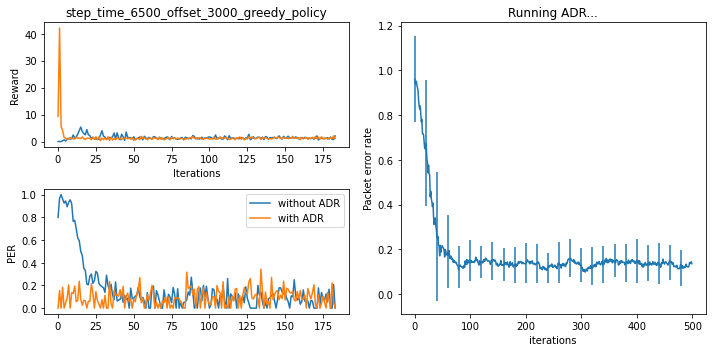

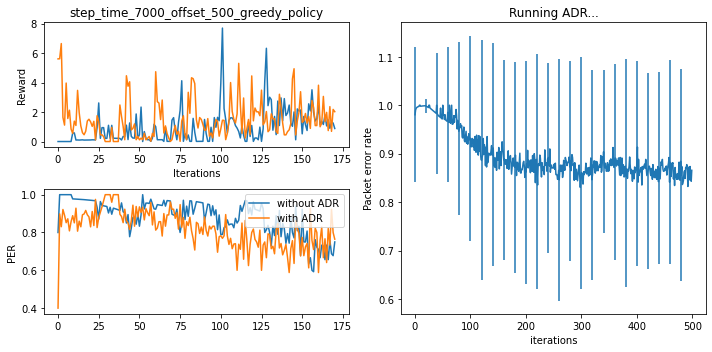

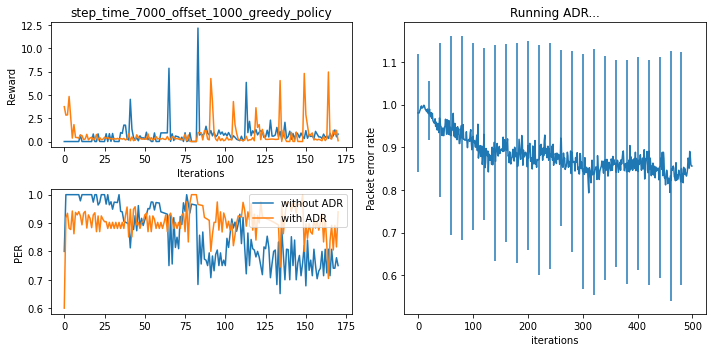

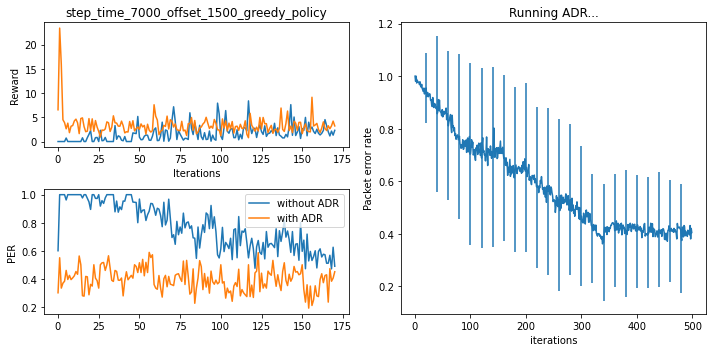

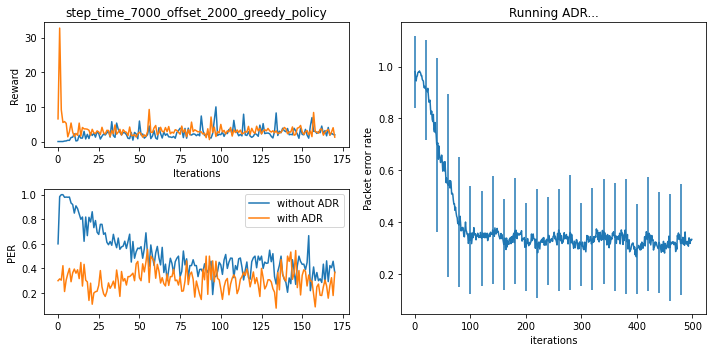

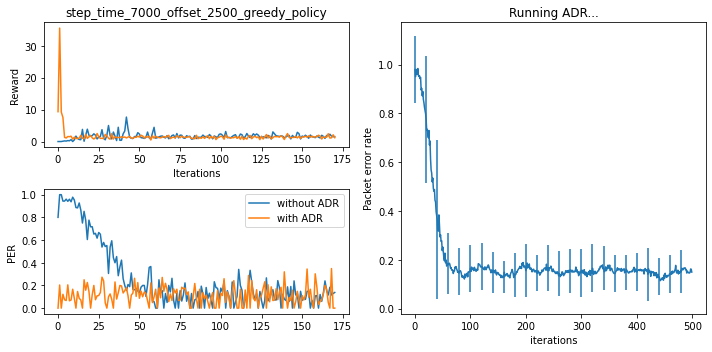

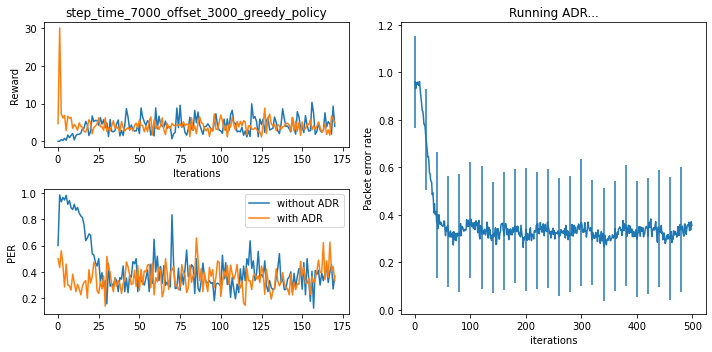

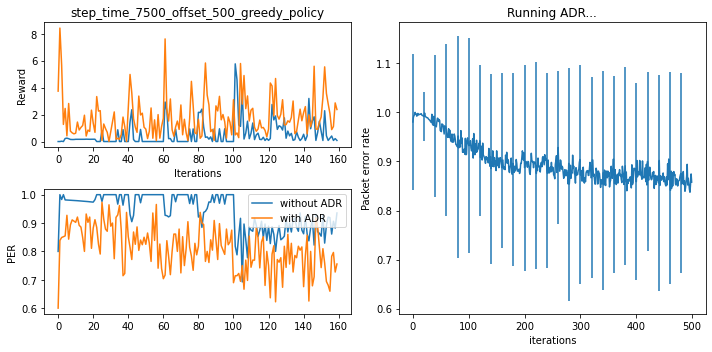

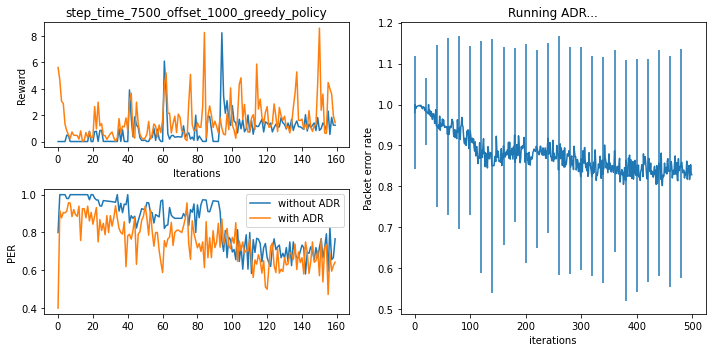

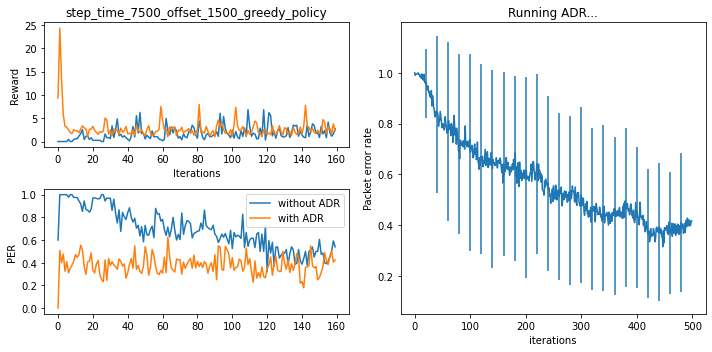

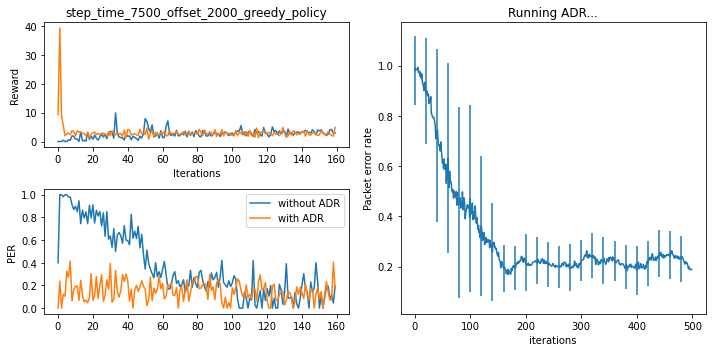

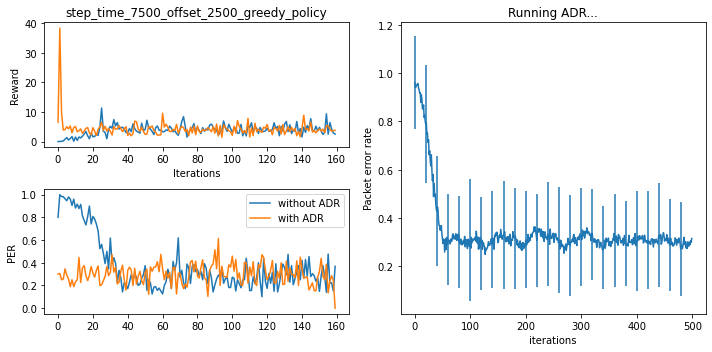

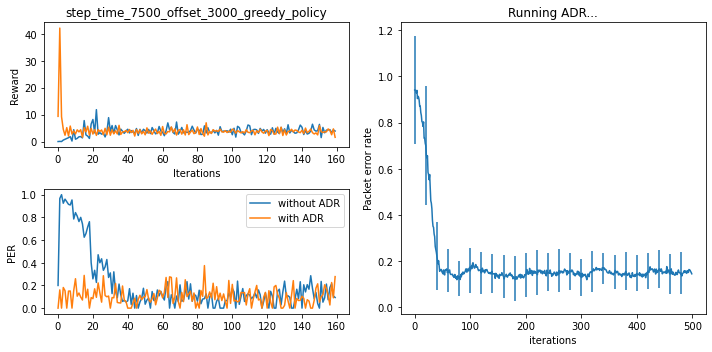

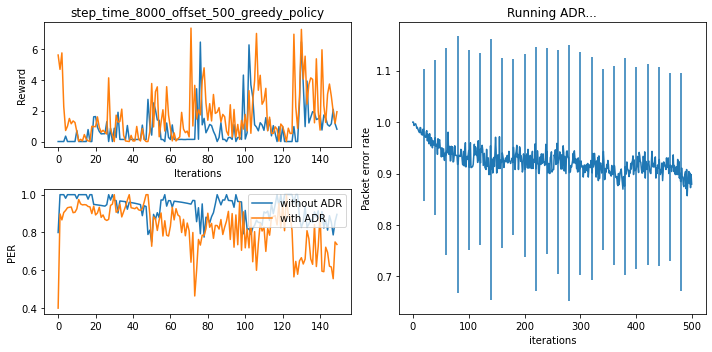

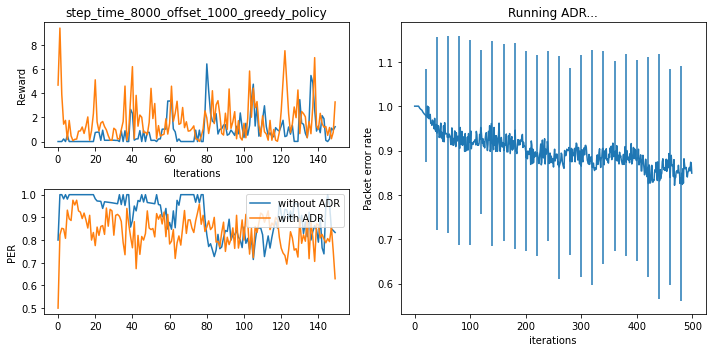

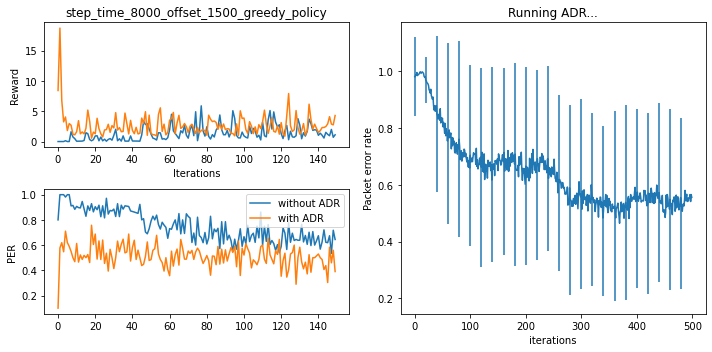

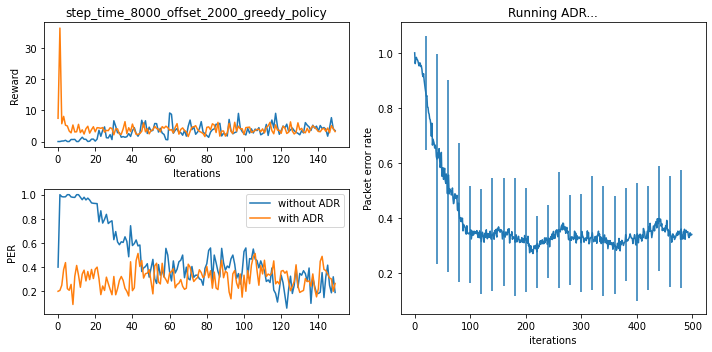

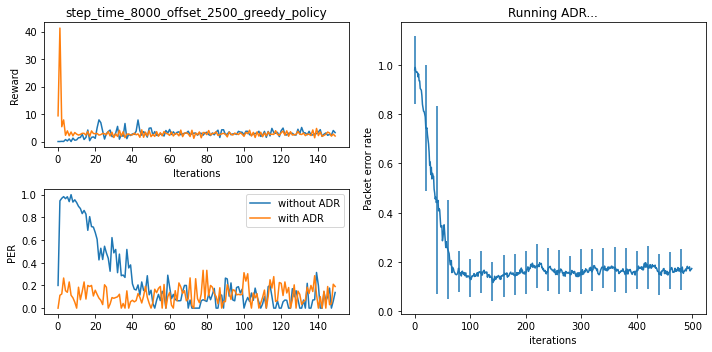

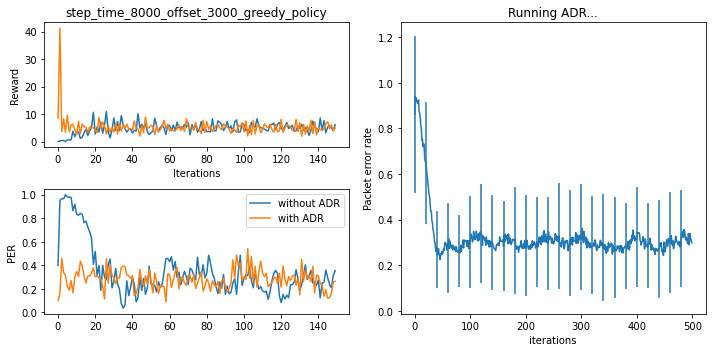

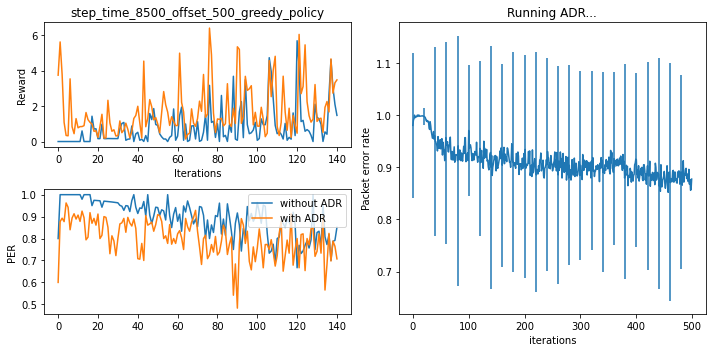

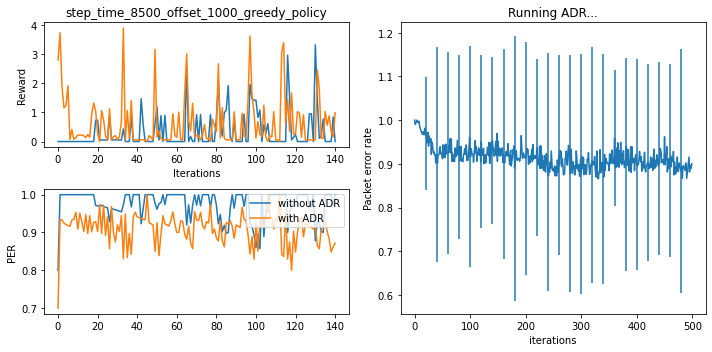

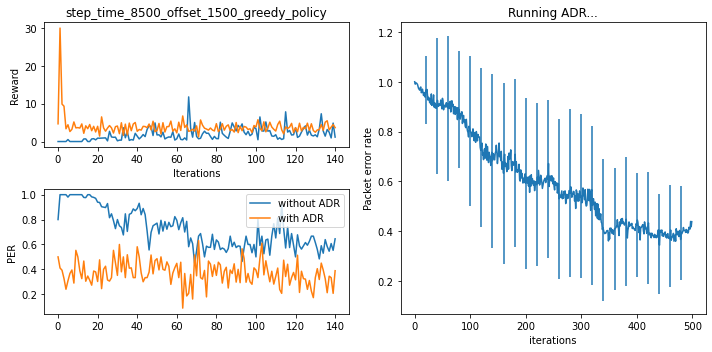

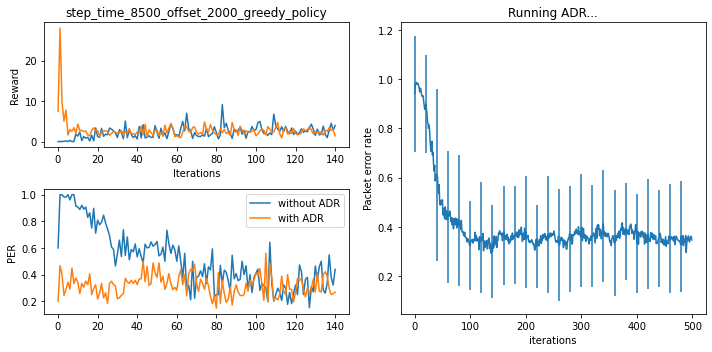

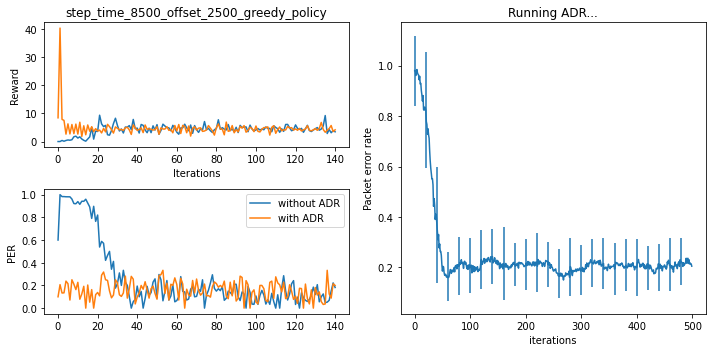

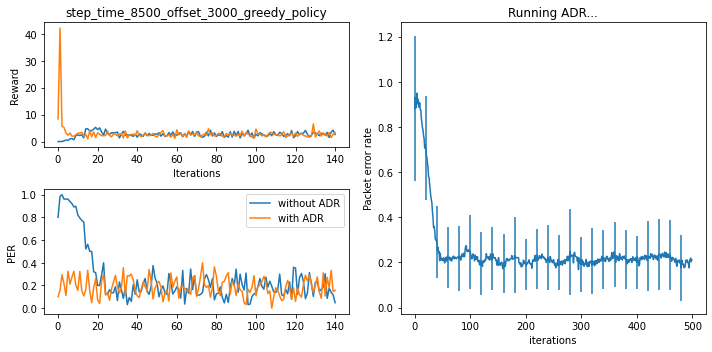

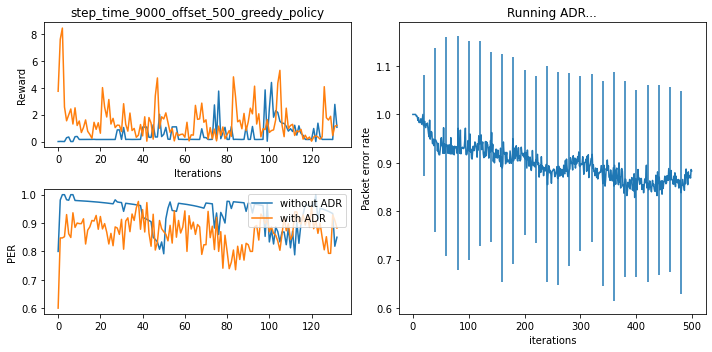

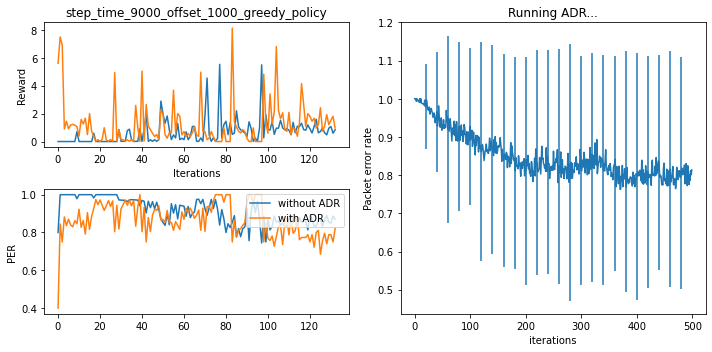

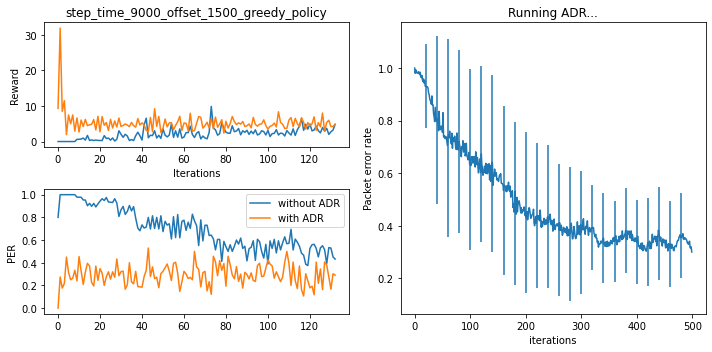

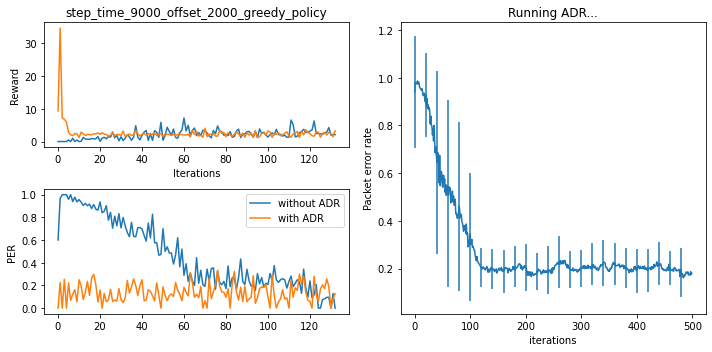

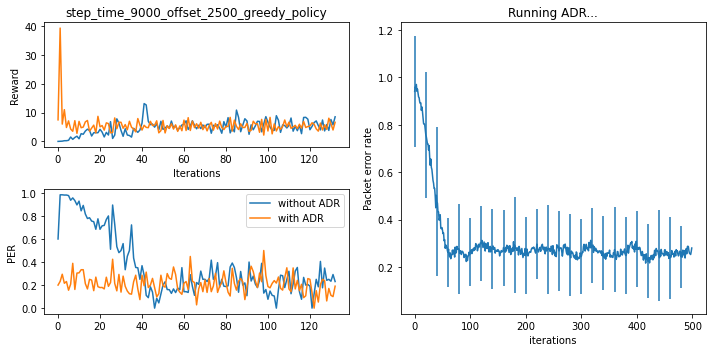

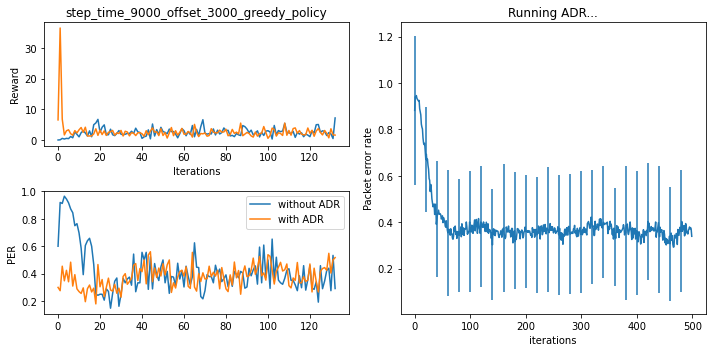

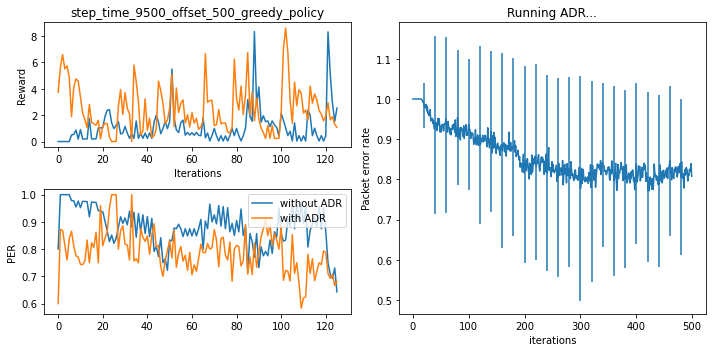

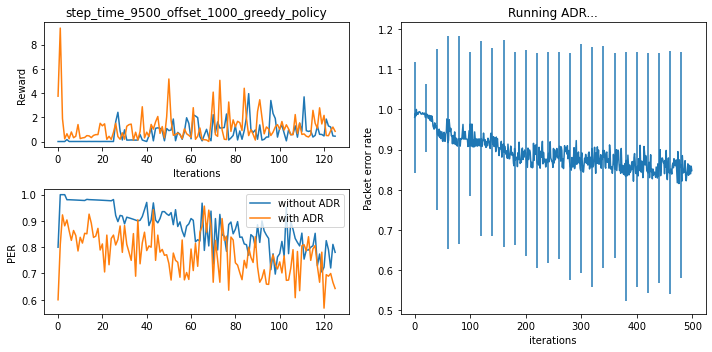

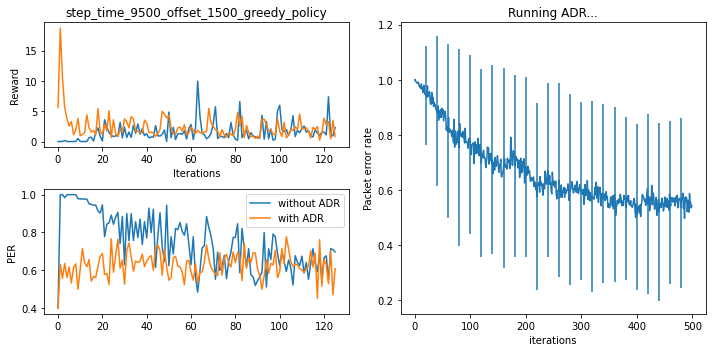

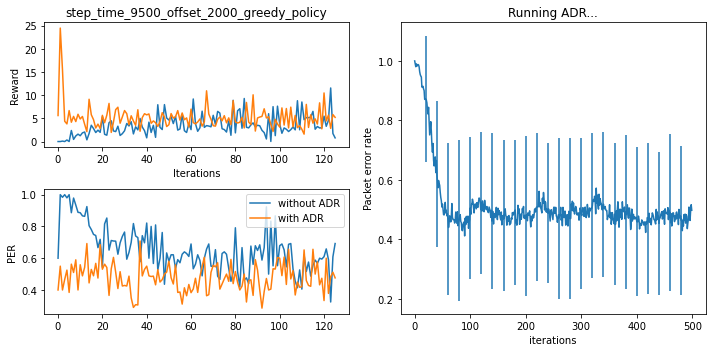

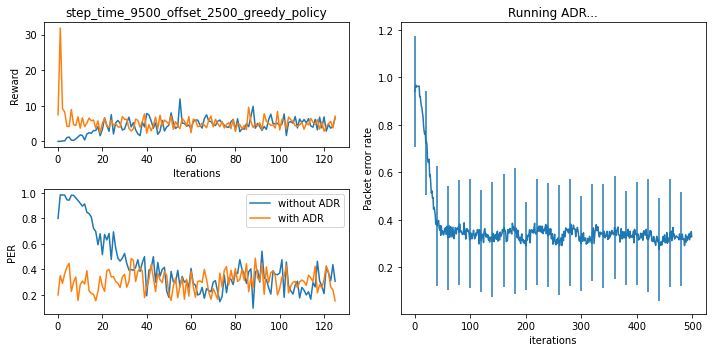

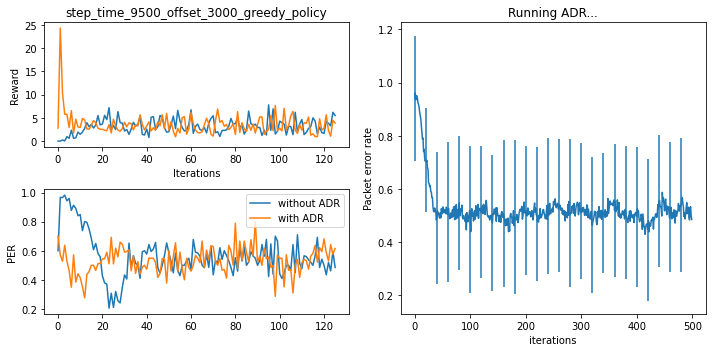

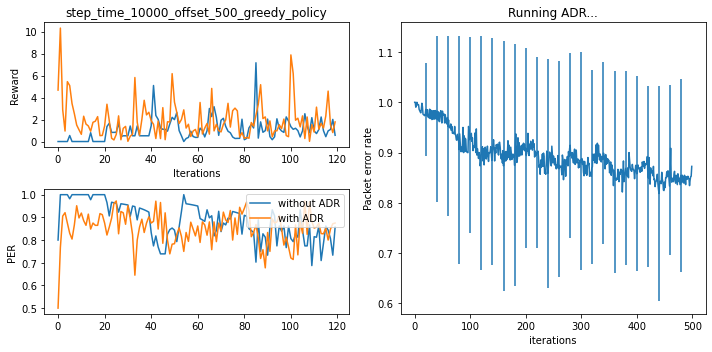

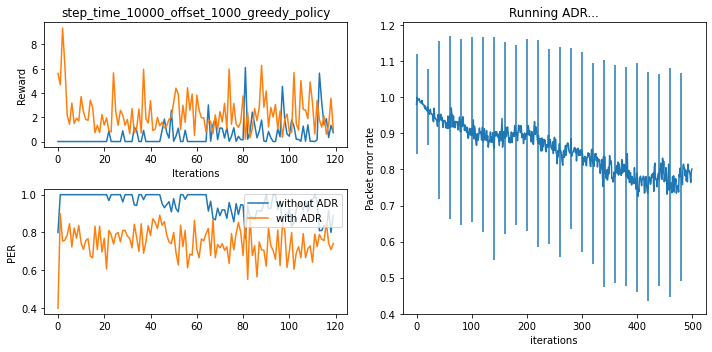

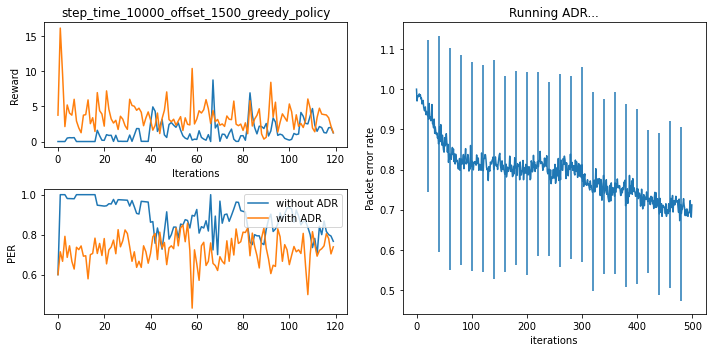

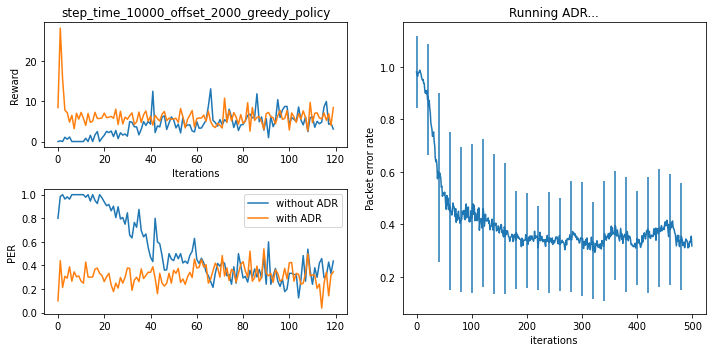

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from Simulation import Simulation
from framework.utils import Location, PerformanceAnimation, GreedyPolicy, PER
from config import *

DEBUG = False

total_time = 20 * MINUTE_TO_MS
step_times = range(6000, 20001, 500)  # ms
offsets = range(500, 3001, 500) 
repeat = 1
node_locations = []
gateway_location = [Location(0, 1000)]
for i in range(-CORD + 5, CORD + 1, 7):
    for j in range(-CORD + 5, CORD + 1, 7):
        x = j * GRID
        y = i * GRID
        node_locations.append(Location(x, y))

        
         # STATE_KEYWORDS = ["location", "failure_rate", "last_update", "current_sensing",
    #                   "num_unique_packets_received", "num_total_packets_sent", "total_transmit_time",
    #                   "total_receive_time", "total_energy_usage", "last_packet_success"]

result_without_pre_adr = np.zeros((len(step_times), len(offsets)))
result_with_pre_adr = np.zeros((len(step_times), len(offsets)))
for i in range(repeat):
    for j, step_time in enumerate(step_times):
        for k, offset in enumerate(offsets):
            num_steps = int(total_time/step_time)
            reward = np.zeros((num_steps, 2))
            iter_PER = np.zeros((num_steps, 2))
            
            simulation = Simulation(node_locations, gateway_location, step_time, offset = offset)
            policy = GreedyPolicy(1000, node_locations)

            for step in range(num_steps):
                action = policy.action_map(simulation)
                reward[step, 0], iter_PER[step, 0] = simulation.step(action)
                policy.update(simulation, action)

            result_without_pre_adr[j, k] = PER(simulation)
            
            simulation.reset(reset_lora = True)
            per, stdev = simulation.pre_adr(500, False)
            simulation.reset()
            policy = GreedyPolicy(1000, node_locations)

            for step in range(num_steps):
                action = policy.action_map(simulation)
                reward[step, 1], iter_PER[step, 1] = simulation.step(action)
                policy.update(simulation, action)

            result_with_pre_adr[j, k] = PER(simulation)
            if i == 0:
                fig = plt.figure(figsize=(10,5))
                ax0 = fig.add_subplot(2,2,1)
                ax1 = fig.add_subplot(2,2,3)
                ax0.set_title("step_time_%d_offset_%d_greedy_policy" %(step_time, offset))
                ax0.plot(reward)
                ax0.set_xlabel("Iterations")
                ax0.set_ylabel("Reward")
                ax1.plot(iter_PER)
                ax1.set_ylabel("PER")
                plt.legend(['without ADR', "with ADR"], loc='upper right')
                ax2 = fig.add_subplot(2,2,(2,4))
                ax2.errorbar(range(len(per)), per, yerr=stdev, errorevery=20)
                ax2.set_title("Running ADR...")
                ax2.set_xlabel("iterations")
                ax2.set_ylabel("Packet error rate")
                plt.tight_layout()
                plt.show()


In [1]:

plt.plot(np.array(step_times)/1000, result_without_pre_adr)
plt.plot(np.array(step_times)/1000, result_with_pre_adr)
plt.legend(["without adr", 'with adr'])
plt.title("Total packet error rate")
plt.ylabel("PER")
plt.xlabel("Time per round/s")
plt.show()

NameError: name 'plt' is not defined